In [1]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
missing=df.isnull().sum().sort_values(ascending=False)

as we see there is lots of missing values present in this dataset we have to check the percentage of data missing

In [5]:
percnt=(df.isnull().sum()/df.shape[0])*100

In [6]:
print(pd.concat([missing,percnt],axis=1,keys=['Missing values','%percent']))

               Missing values   %percent
Sunshine                 3994  47.406528
Evaporation              3512  41.685460
Cloud3pm                 2455  29.139466
Cloud9am                 2421  28.735905
Pressure3pm              1312  15.572700
Pressure9am              1309  15.537092
WindGustDir               991  11.762611
WindGustSpeed             991  11.762611
WindDir9am                829   9.839763
WindDir3pm                308   3.655786
RainToday                 240   2.848665
Rainfall                  240   2.848665
RainTomorrow              239   2.836795
WindSpeed3pm              107   1.270030
Humidity3pm               102   1.210682
Temp3pm                    96   1.139466
WindSpeed9am               76   0.902077
MinTemp                    75   0.890208
MaxTemp                    60   0.712166
Humidity9am                59   0.700297
Temp9am                    56   0.664688
Location                    0   0.000000
Date                        0   0.000000


here is lots of missing values we can t remove them because they all need for prediction and analysis so first we need to analyse the variables then we have to decide wether we drop or keep 

In [7]:
df.drop(['Sunshine','Evaporation','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [8]:
missing=df.isnull().sum().sort_values(ascending=False)
percnt=(df.isnull().sum()/df.shape[0])*100
print(pd.concat([missing,percnt],axis=1,keys=['Missing values','%percent']))

               Missing values   %percent
Pressure3pm              1312  15.572700
Pressure9am              1309  15.537092
WindGustDir               991  11.762611
WindGustSpeed             991  11.762611
WindDir9am                829   9.839763
WindDir3pm                308   3.655786
RainToday                 240   2.848665
Rainfall                  240   2.848665
RainTomorrow              239   2.836795
WindSpeed3pm              107   1.270030
Humidity3pm               102   1.210682
Temp3pm                    96   1.139466
WindSpeed9am               76   0.902077
MinTemp                    75   0.890208
MaxTemp                    60   0.712166
Humidity9am                59   0.700297
Temp9am                    56   0.664688
Location                    0   0.000000
Date                        0   0.000000


### now we have to fill the missing values 

In [9]:
columns_NaN = df.columns[df.isnull().any()]
columns_NaN

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### these are the column having missing values we can use mean or median to fill numeica and mode to fill the categorical

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

selected data of missing values

In [11]:
num=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

cat=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

### for numerical

In [12]:
for i in num:
    df[i].fillna(df[i].mean(),inplace=True)

### for categorical

In [13]:
for i in cat:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
missing=df.isnull().sum().sort_values(ascending=False)
percnt=(df.isnull().sum()/df.shape[0])*100
print(pd.concat([missing,percnt],axis=1,keys=['Missing values','%percent']))

               Missing values  %percent
Date                        0       0.0
WindSpeed3pm                0       0.0
RainToday                   0       0.0
Temp3pm                     0       0.0
Temp9am                     0       0.0
Pressure3pm                 0       0.0
Pressure9am                 0       0.0
Humidity3pm                 0       0.0
Humidity9am                 0       0.0
WindSpeed9am                0       0.0
Location                    0       0.0
WindDir3pm                  0       0.0
WindDir9am                  0       0.0
WindGustSpeed               0       0.0
WindGustDir                 0       0.0
Rainfall                    0       0.0
MaxTemp                     0       0.0
MinTemp                     0       0.0
RainTomorrow                0       0.0


### now the dataset is cleaned

we need to change the date and time columns first and make three diffrent columns for day,month,year

In [16]:
df['Date']=pd.to_datetime(df['Date'])

In [17]:
df['day']=df['Date'].dt.day
#df['month']=df['Date'].dt.month
#df['year']=df['Date'].df.year

In [18]:
df['month']=df['Date'].dt.month

In [19]:
df['year']=df['Date'].dt.year

In [20]:
# now we have to remove the date columns
df.drop('Date',axis=1,inplace=True)

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['day', 'month', 'year'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [22]:
numerical=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','day', 'month', 'year']

categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [23]:
for i in categorical:
    print(df[i].value_counts())
    print("\n")

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64


WindGustDir
N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: count, dtype: int64


WindDir9am
N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: count, dtype: int64


WindDir3pm
SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: count, dtype: int64


RainToday
No     

<Axes: xlabel='MinTemp', ylabel='Count'>

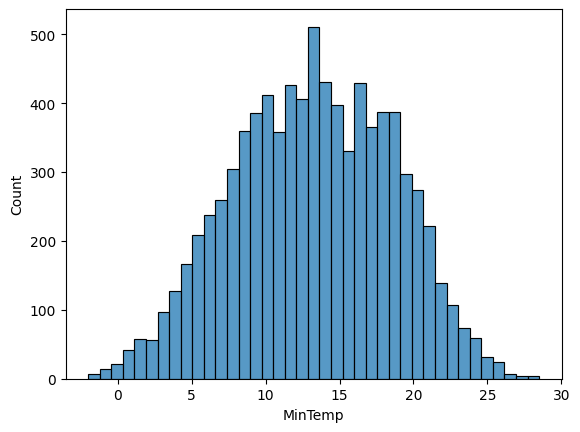

In [24]:
sns.histplot(x='MinTemp',data=df)

<Axes: xlabel='MaxTemp', ylabel='Count'>

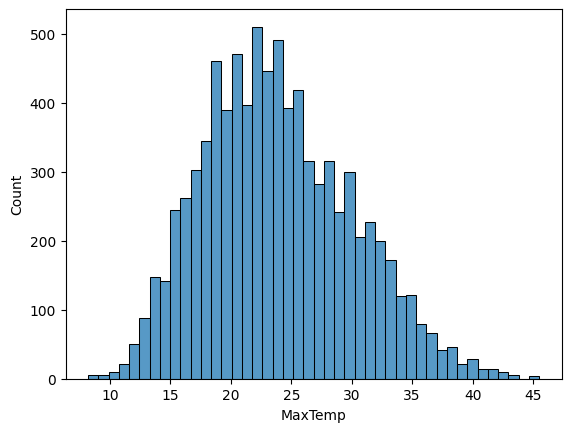

In [25]:
sns.histplot(x='MaxTemp',data=df)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

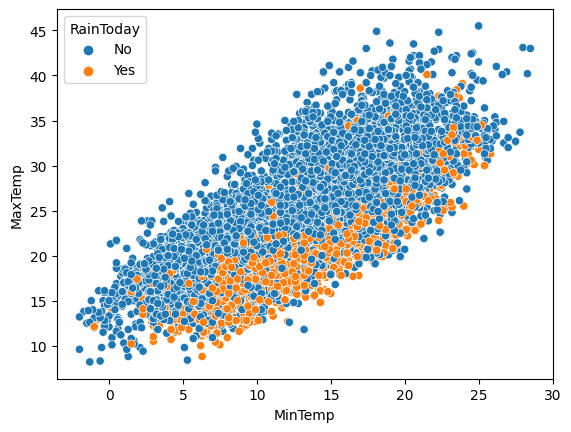

In [26]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainToday',data=df)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

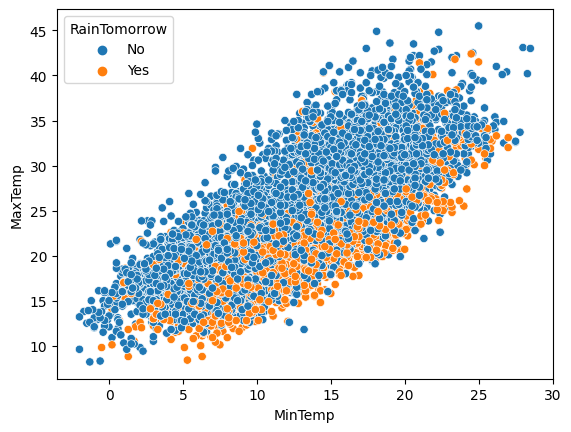

In [27]:
sns.scatterplot(y='MaxTemp',x='MinTemp',hue='RainTomorrow',data=df)

<Axes: xlabel='Rainfall', ylabel='Location'>

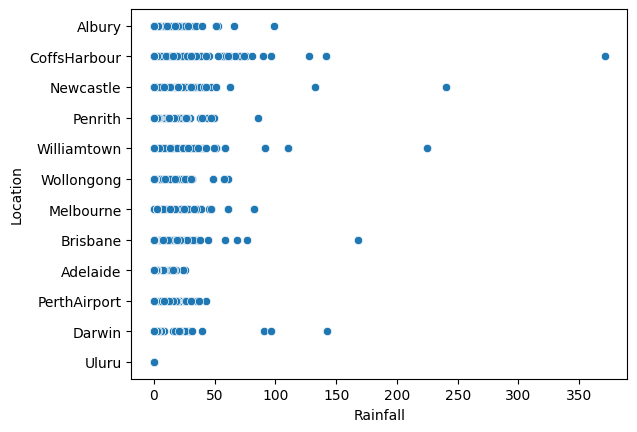

In [28]:
sns.scatterplot(x='Rainfall',y='Location',data=df)

as we can see than all the location having maximum range of rainfall in between 0 to 50 mm except some of the location having 150,200,250,350 


as  we can see there is maximim number of negative response on every location

<Axes: xlabel='WindGustSpeed', ylabel='Location'>

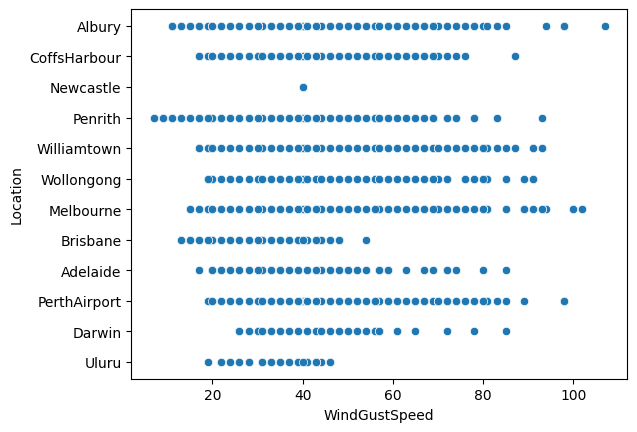

In [29]:
sns.scatterplot(x='WindGustSpeed',y='Location',data=df)

<Axes: xlabel='WindGustSpeed', ylabel='WindGustDir'>

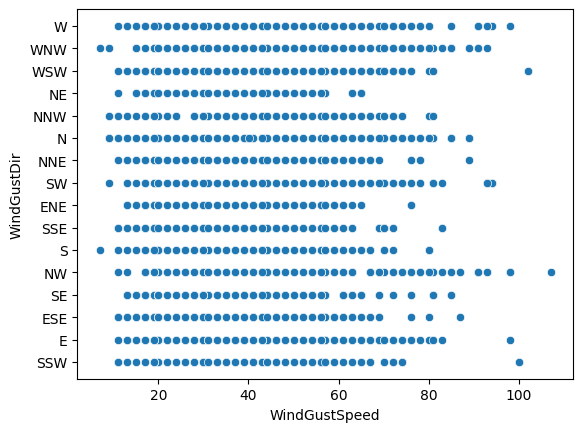

In [30]:
sns.scatterplot(x='WindGustSpeed',y='WindGustDir',data=df)

in the range of 20 to 80 the wind is maxium 

<Axes: xlabel='WindSpeed9am', ylabel='WindSpeed3pm'>

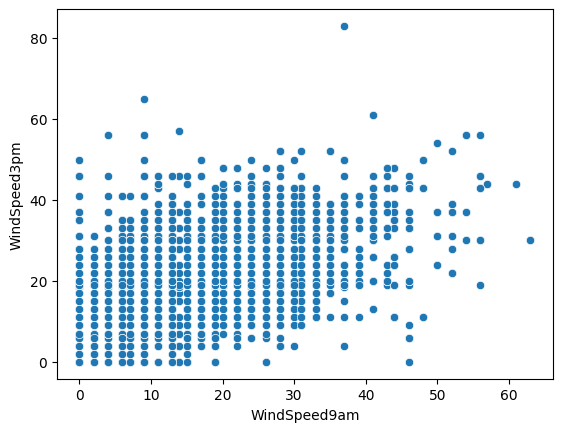

In [31]:
sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',data=df)

wind speed is more in daytime as compare with 3am 

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

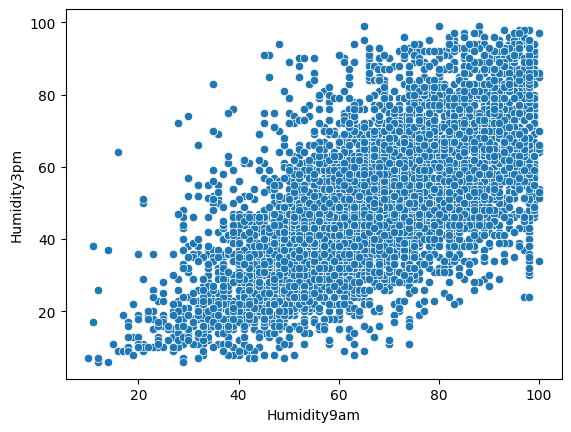

In [32]:
sns.scatterplot(x='Humidity9am',y='Humidity3pm',data=df)

<Axes: xlabel='Humidity9am', ylabel='RainToday'>

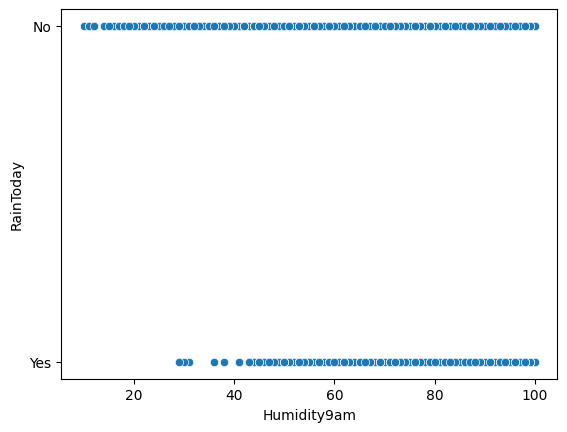

In [33]:
sns.scatterplot(x='Humidity9am',y='RainToday',data=df)

<Axes: xlabel='Humidity3pm', ylabel='RainToday'>

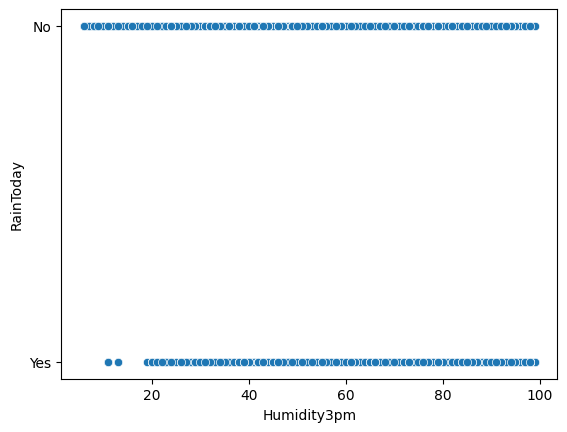

In [34]:
sns.scatterplot(x='Humidity3pm',y='RainToday',data=df)

### location vs raintoday

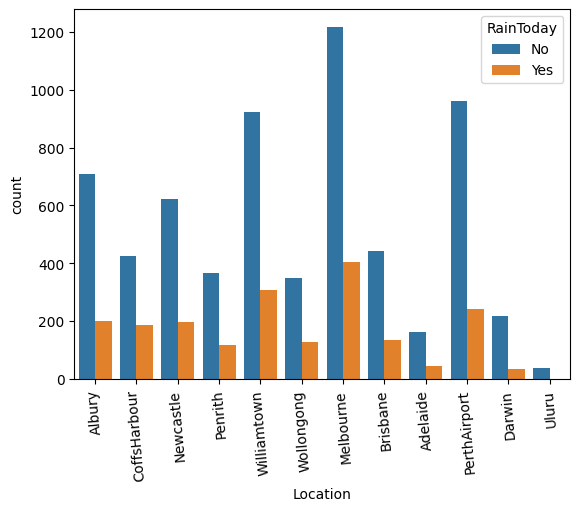

In [35]:
sns.countplot(hue='RainToday',x='Location',data=df)
plt.xticks(rotation=95)
plt.show()

### location as per rain tommorow

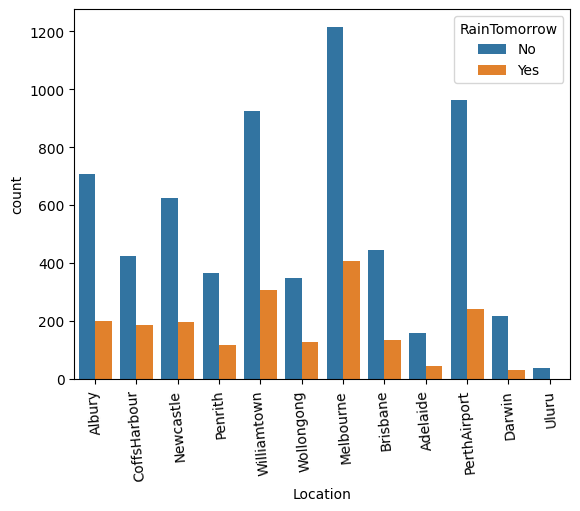

In [36]:
sns.countplot(hue='RainTomorrow',x='Location',data=df)
plt.xticks(rotation=95)
plt.show()

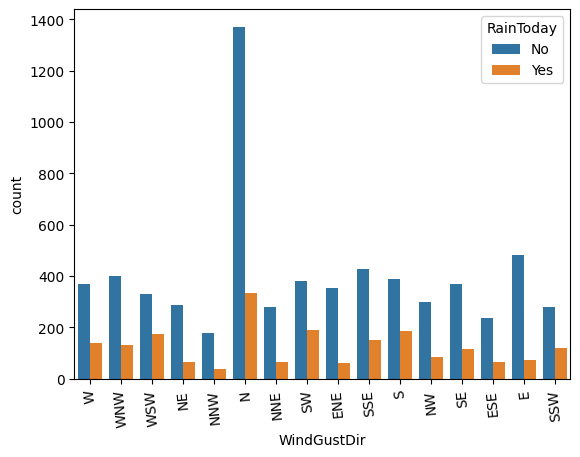

In [37]:
sns.countplot(x='WindGustDir',data=df,hue='RainToday')
plt.xticks(rotation=95)
plt.show()

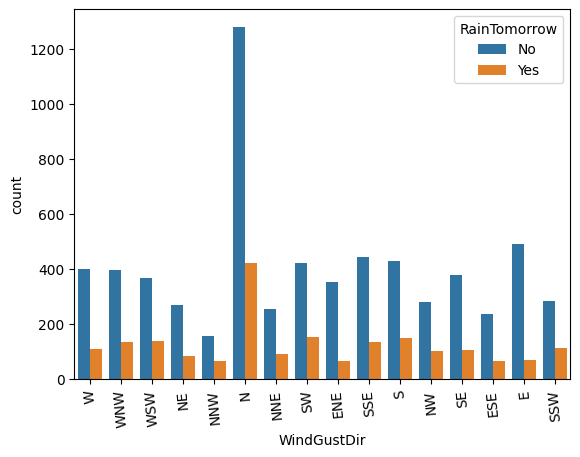

In [38]:
sns.countplot(x='WindGustDir',data=df,hue='RainTomorrow')
plt.xticks(rotation=95)
plt.show()

### rain today 

<Axes: xlabel='RainToday', ylabel='count'>

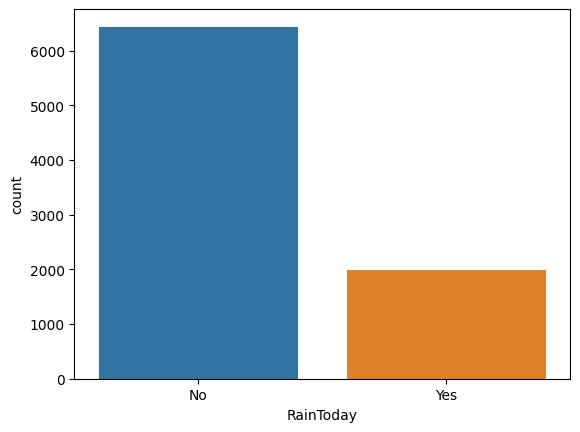

In [39]:
sns.countplot(x='RainToday',data=df)

## rain tommorow

<Axes: xlabel='RainTomorrow', ylabel='count'>

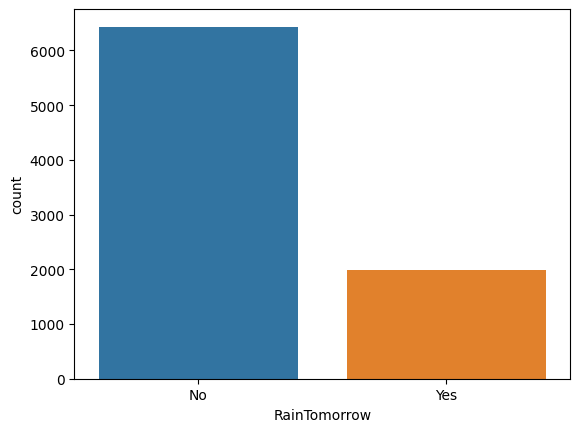

In [40]:
sns.countplot(x='RainTomorrow',data=df)

### encoding categorical variable

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   WindGustDir    8425 non-null   object 
 5   WindGustSpeed  8425 non-null   float64
 6   WindDir9am     8425 non-null   object 
 7   WindDir3pm     8425 non-null   object 
 8   WindSpeed9am   8425 non-null   float64
 9   WindSpeed3pm   8425 non-null   float64
 10  Humidity9am    8425 non-null   float64
 11  Humidity3pm    8425 non-null   float64
 12  Pressure9am    8425 non-null   float64
 13  Pressure3pm    8425 non-null   float64
 14  Temp9am        8425 non-null   float64
 15  Temp3pm        8425 non-null   float64
 16  RainToday      8425 non-null   object 
 17  RainTomorrow   8425 non-null   object 
 18  day     

In [43]:
categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
le=LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])
    

In [44]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008


## outliers detection

In [45]:
len(numerical)

15

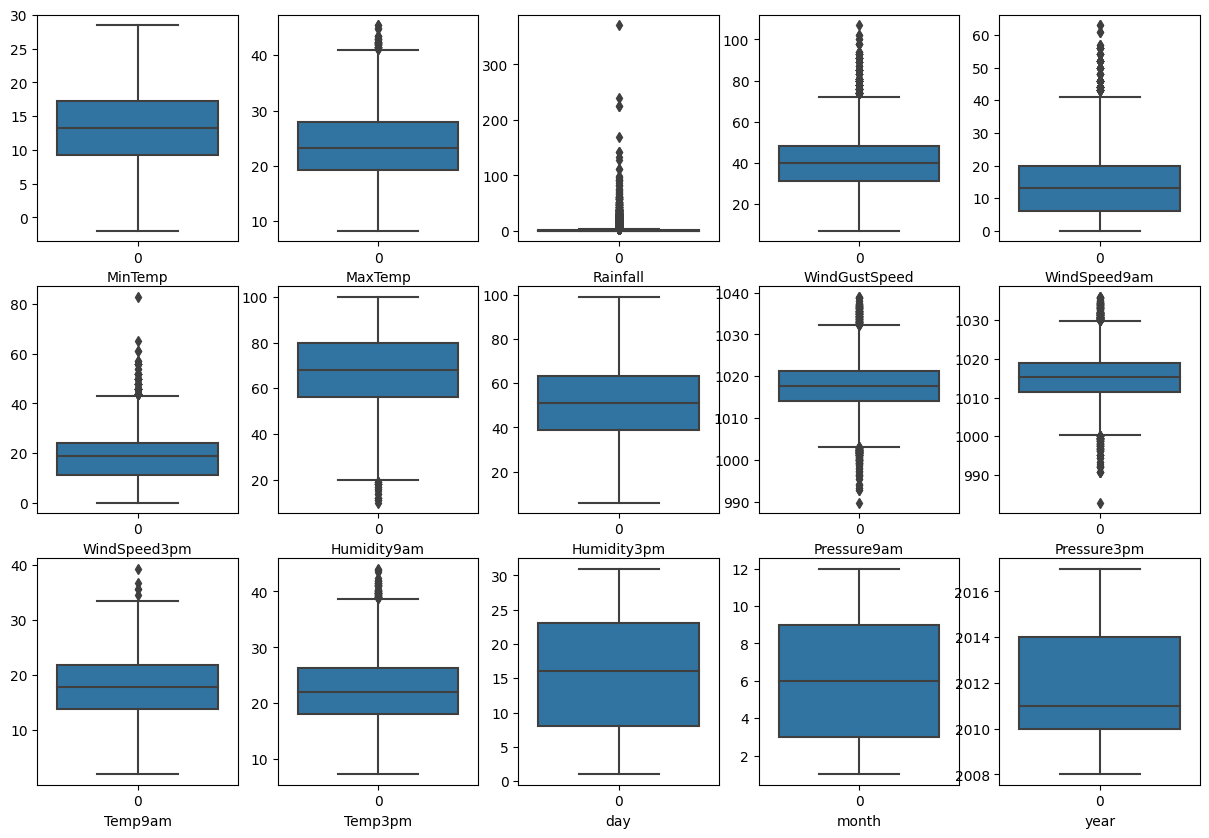

In [46]:
plt.figure(figsize=(15,10))
p=1
for i in numerical:
    if p<=15:
        plt.subplot(3,5,p)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=10)
    p+=1
plt.show()

ther is huge outlier present we have to reduce or remove the outlier with z score method

In [47]:
from scipy.stats import zscore

In [48]:
z=np.abs(zscore(df))

In [49]:
df1=df.copy()

In [50]:
df2=df1[(z<3).all(axis=1)]

In [51]:
df2

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,13.4,22.900000,0.6,13,44.000000,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.0,14,44.000000,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.0,15,46.000000,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.0,4,24.000000,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.0,13,41.000000,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,0,31.000000,9,1,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,6,22.000000,9,3,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,3,37.000000,9,14,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,9,28.000000,10,3,13.0,7.0,...,24.0,1019.4,1016.5,15.1,26.0,0,0,24,6,2017


In [52]:
print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

Shape of the dataframe before removing outliers:  (8425, 21)
Shape of the dataframe after removing outliers:  (8061, 21)
Percentage of data loss post outlier removal:  4.320474777448071


as we can see thers is outliers removed and with 4% of data loss its good to move on next step

In [53]:
df=df1.copy()

## check for the skewness

In [54]:
import warnings
warnings.filterwarnings("ignore")

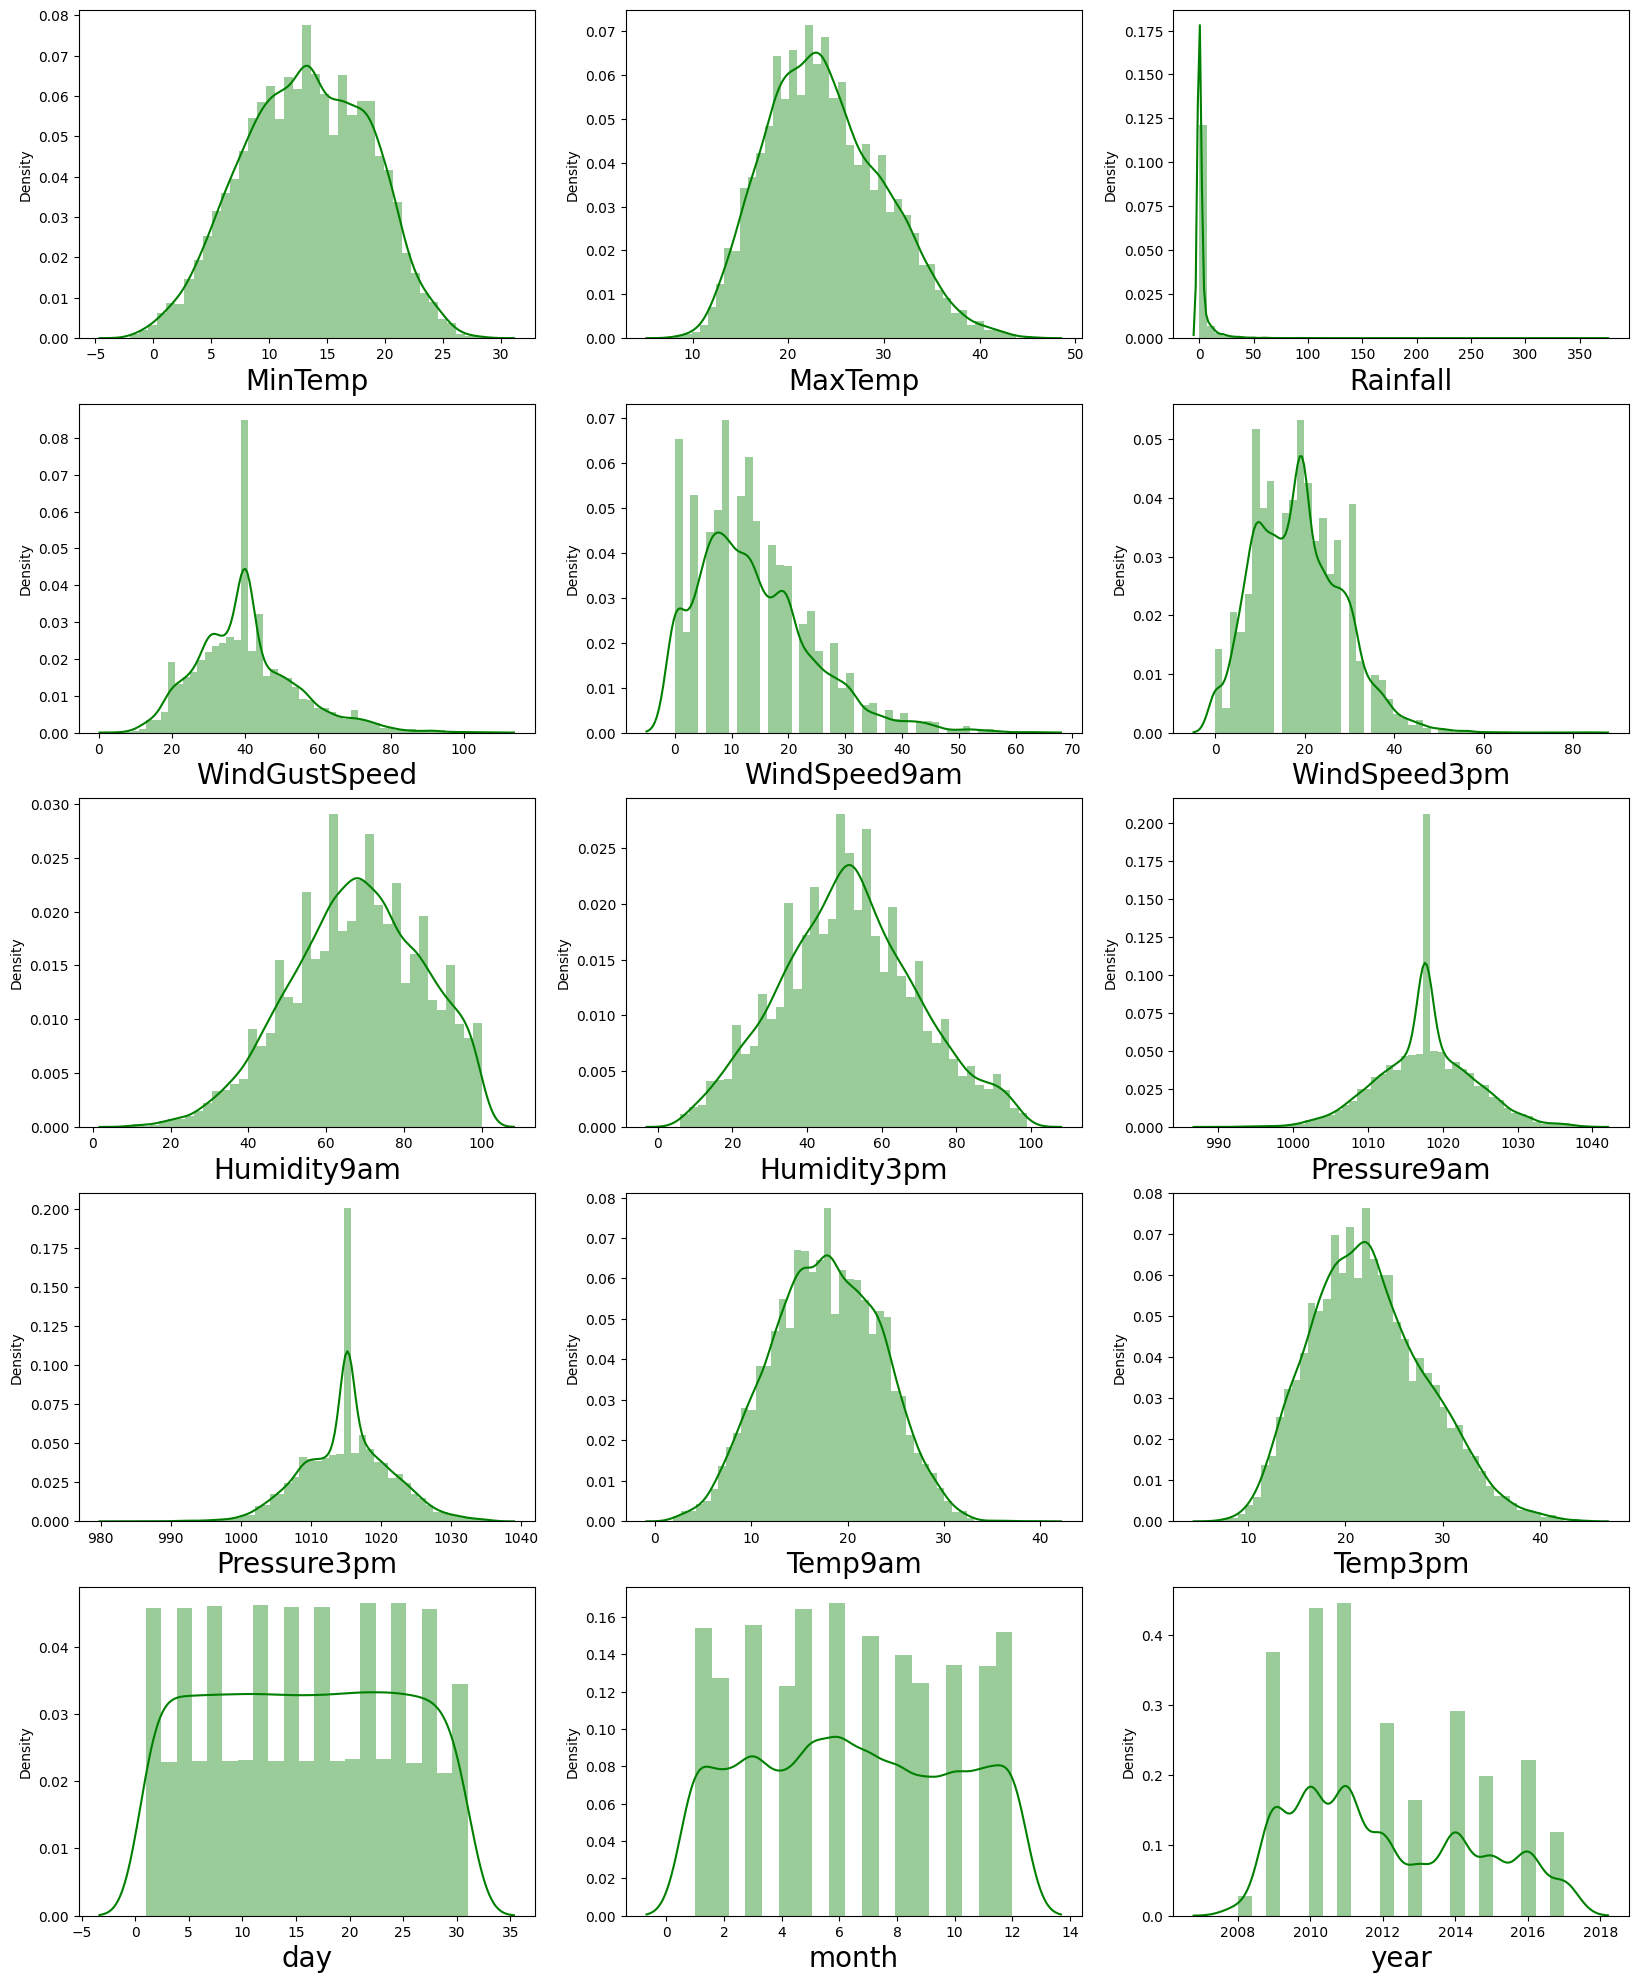

In [55]:
plt.figure(figsize=(20,35))
p=1
for i in numerical:
    if p<=21:
        plt.subplot(7,3,p)
        sns.distplot(df[i],color='green')
        plt.xlabel(i,fontsize=20)
    p+=1
plt.show()

as we can see ther is litle bit of columns which are skewed lets see

In [56]:
df[numerical].skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Temp9am          -0.014748
Temp3pm           0.397331
day               0.004260
month             0.039388
year              0.418663
dtype: float64

In [57]:
from sklearn.preprocessing import PowerTransformer

In [58]:
pt=PowerTransformer(method='yeo-johnson')

In [59]:
skew=['Rainfall','WindGustSpeed','WindSpeed9am']

In [60]:
df[skew]=pt.fit_transform(df[skew].values)

In [61]:
df[skew].skew()

Rainfall         0.904387
WindGustSpeed    0.010481
WindSpeed9am    -0.079333
dtype: float64

its been reduced alot its good to go on next step

### lets check coorelation

In [62]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
Location,1.000000,0.116531,0.064268,0.024286,-0.035408,0.249367,-0.027103,-0.027736,0.233349,0.231801,...,0.055790,-0.032261,-0.020574,0.118051,0.060570,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116531,1.000000,0.717522,0.082076,-0.145316,0.254290,-0.041650,-0.147166,0.161455,0.178349,...,0.079048,-0.429432,-0.422991,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.064268,0.717522,1.000000,-0.238590,-0.224670,0.158856,-0.214119,-0.180622,0.023585,0.088172,...,-0.421879,-0.325721,-0.403258,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,0.024286,0.082076,-0.238590,1.000000,0.144911,0.097509,0.164709,0.116726,0.043922,0.039828,...,0.390642,-0.132379,-0.053022,-0.103633,-0.249382,0.885527,0.333766,-0.021975,0.023223,0.016526
WindGustDir,-0.035408,-0.145316,-0.224670,0.144911,1.000000,0.008511,0.403562,0.505799,0.065794,0.094623,...,0.053567,-0.109704,-0.024997,-0.176318,-0.238856,0.125188,0.051832,0.015683,0.034823,-0.088340
WindGustSpeed,0.249367,0.254290,0.158856,0.097509,0.008511,1.000000,-0.067196,0.079126,0.555982,0.639117,...,-0.094154,-0.400029,-0.363414,0.228969,0.121708,0.077574,0.180817,-0.003988,0.053461,-0.027398
WindDir9am,-0.027103,-0.041650,-0.214119,0.164709,0.403562,-0.067196,1.000000,0.249527,0.122927,0.047116,...,0.124556,-0.011024,0.073446,-0.103111,-0.221634,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147166,-0.180622,0.116726,0.505799,0.079126,0.249527,1.000000,0.032190,0.068799,...,-0.012167,-0.136517,-0.043681,-0.165072,-0.194463,0.100125,0.008918,0.003089,0.029384,-0.005812
WindSpeed9am,0.233349,0.161455,0.023585,0.043922,0.065794,0.555982,0.122927,0.032190,1.000000,0.561027,...,-0.098442,-0.170564,-0.134297,0.135590,0.005833,0.039836,0.067219,-0.007477,0.039422,-0.098806
WindSpeed3pm,0.231801,0.178349,0.088172,0.039828,0.094623,0.639117,0.047116,0.068799,0.561027,1.000000,...,-0.091004,-0.251697,-0.207544,0.184188,0.066087,0.015268,0.053568,-0.008957,0.049483,-0.051466


<Axes: >

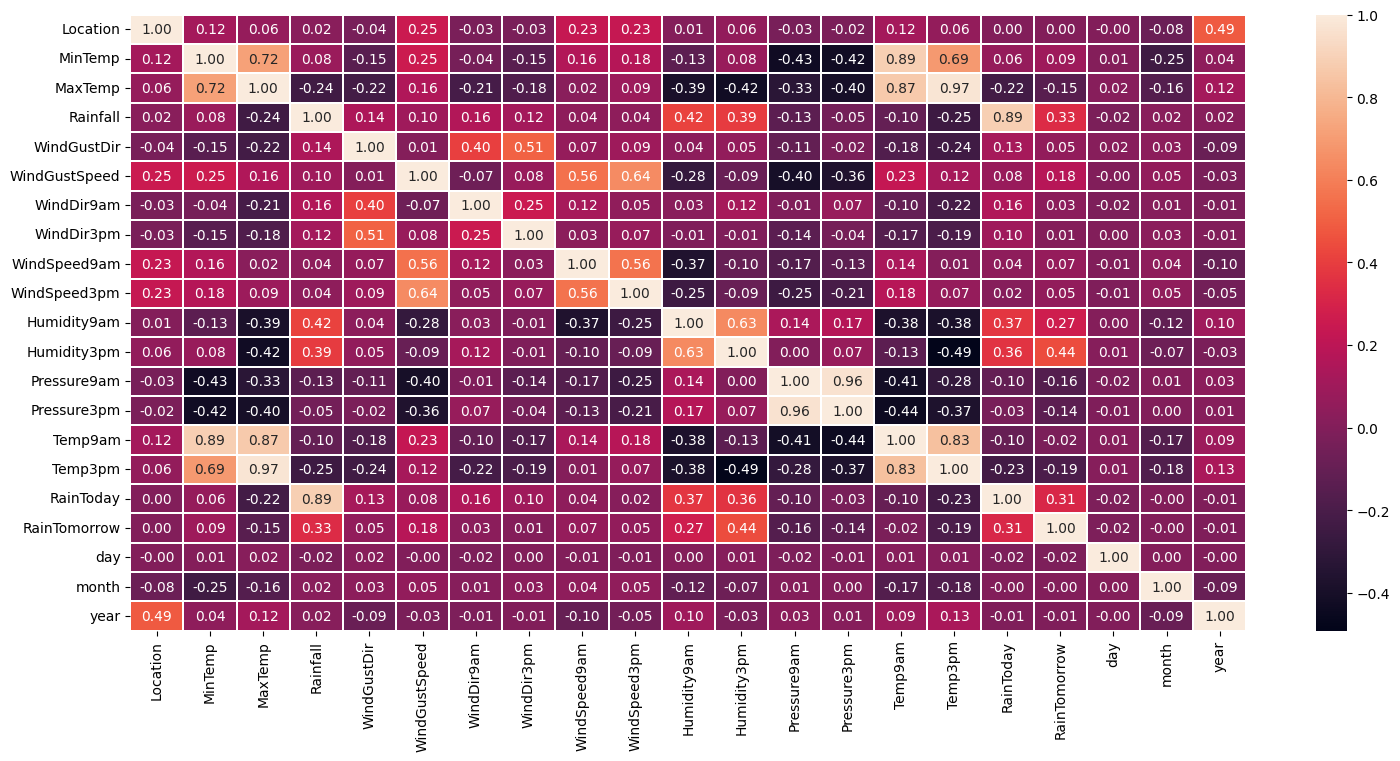

In [63]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),fmt='0.2f',annot=True,linewidth=0.01)

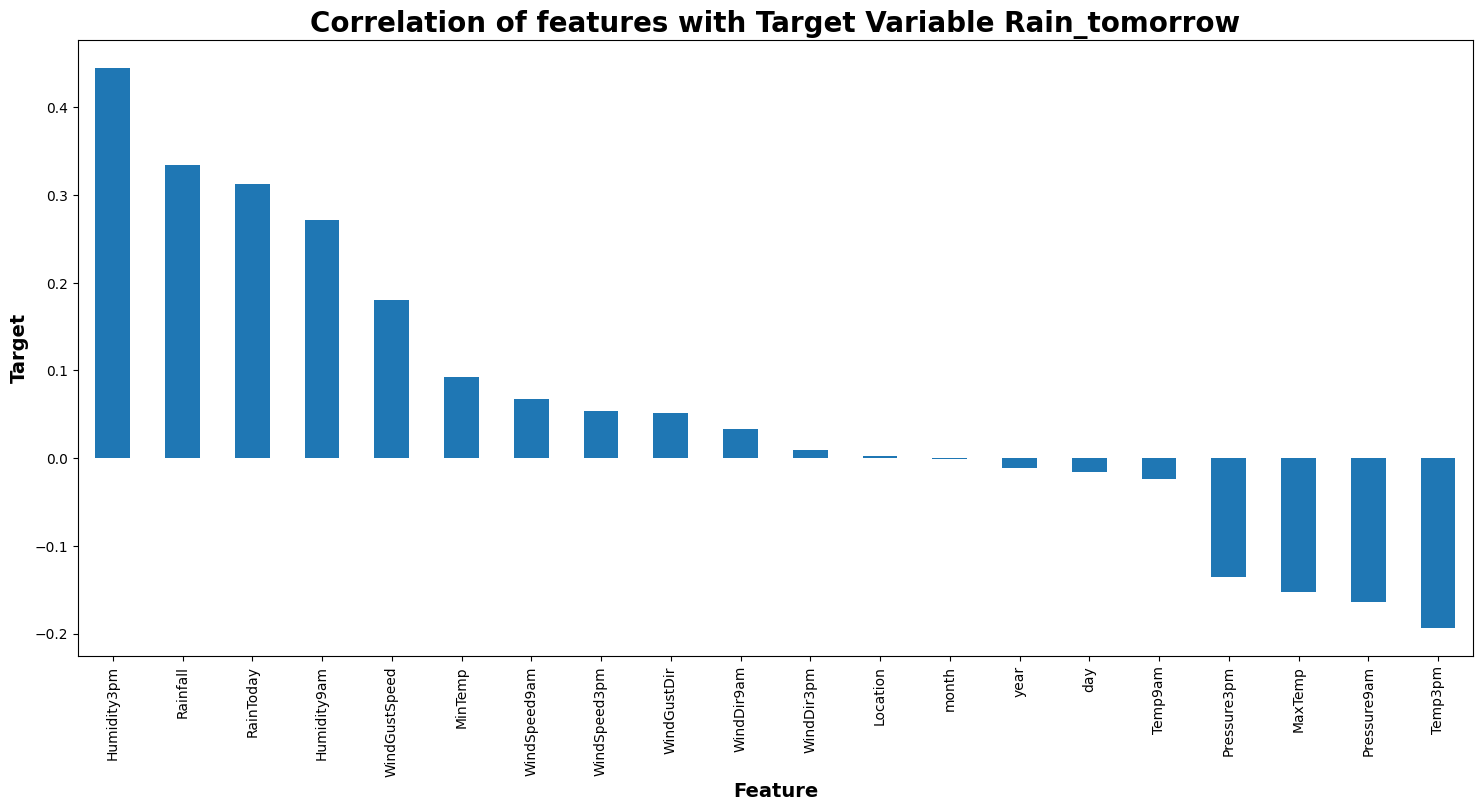

In [64]:
plt.figure(figsize=(18,8))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Rain_tomorrow',fontsize=20,fontweight='bold')
plt.show()

##### now its time yo seprate the target variable and fatures in x and y after that we have to check the target varivale is balance or not if not then we have to balance them using SMOTE method

In [65]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [66]:
print(x.shape)
print(y.shape)

(8425, 20)
(8425,)


In [67]:
# check for the data balacne in target variable

df['RainTomorrow'].value_counts()

RainTomorrow
0    6434
1    1991
Name: count, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm=SMOTE()

In [70]:
x,y=sm.fit_resample(x,y)

In [71]:
y.value_counts()

RainTomorrow
0    6434
1    6434
Name: count, dtype: int64

#### We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.


## now its time to do standardscaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
x_scale=pd.DataFrame(sc.fit_transform(x.values),columns=x.columns)

In [75]:
x_scale

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,day,month,year
0,-1.538357,-0.018448,-0.056280,0.307594,1.270626,0.273564,1.287120,1.464565,0.695633,0.527484,0.016006,-1.781357,-1.486337,-1.231425,-0.138016,0.016684,-0.612438,-1.665244,1.723046,-1.632974
1,-1.538357,-1.167318,0.312812,-0.876945,1.491868,0.273564,-0.282205,1.698483,-1.062381,0.323041,-1.612846,-1.625746,-1.024902,-1.118895,-0.082803,0.444500,-0.612438,-1.550068,1.723046,-1.632974
2,-1.538357,-0.114187,0.413474,-0.876945,1.713109,0.410200,1.287120,1.698483,0.613979,0.731928,-1.974813,-1.366395,-1.502248,-0.974214,0.616563,0.256261,-0.612438,-1.434892,1.723046,-1.632974
3,-1.538357,-0.822657,0.799343,-0.876945,-0.720548,-1.387030,0.390363,-1.810279,-0.135687,-1.005842,-1.552518,-2.092579,0.088905,-0.315111,0.082837,0.820979,-0.612438,-1.319716,1.723046,-1.632974
4,-1.538357,0.766614,1.520750,0.648427,1.270626,0.060909,-1.403152,-0.172857,-0.613192,0.118597,0.679613,-1.210784,-0.993079,-1.408258,0.027624,1.368584,-0.612438,-1.204540,1.723046,-1.632974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,-1.863327,-0.666986,-1.557726,-0.671464,0.385660,0.410200,1.062931,0.061061,-0.198742,-0.301462,0.263288,0.164047,0.736389,0.799978,-1.374561,-1.490924,-0.612438,-0.052781,0.210889,0.419288
12864,-1.213386,0.306426,-0.495463,1.512194,0.606901,-0.578636,1.062931,0.528895,0.071572,0.081683,1.381761,0.852789,0.216197,0.355782,-0.326457,-0.349434,1.632819,1.098977,0.815752,-0.812069
12865,0.736436,-1.206896,-0.082203,-0.876945,-0.056823,0.115733,-0.506395,1.230648,-0.361889,0.790045,0.271037,-0.374961,0.090292,-0.037518,-0.772938,-0.133039,-0.612438,-1.434892,0.513320,0.008836
12866,-0.888416,1.176691,0.719199,1.073275,-1.163031,-0.714371,1.062931,-1.342444,0.247413,-0.162600,0.962858,0.162333,0.488937,0.674468,0.820038,0.834782,-0.612438,-0.859013,-1.301268,-1.222522


#### now its time to check for the multicoolineraity

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['vif values']=[variance_inflation_factor(x_scale,i) for i in range(len(x.columns))]

In [78]:
vif

,features,vif values
0,Location,1.583284
1,MinTemp,8.688171
2,MaxTemp,25.041893
3,Rainfall,3.826576
4,WindGustDir,1.556693
5,WindGustSpeed,2.367250
6,WindDir9am,1.397983
7,WindDir3pm,1.486435
8,WindSpeed9am,2.072061
9,WindSpeed3pm,2.107607


as we can see vif is not in range but we cant drop those variable these are important

## Model Building

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7935767935767936 on Random_state 36


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, random_state=maxRS, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7935767935767936


Confusion matrix of Logistics Regression : 
 [[1553  374]
 [ 423 1511]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1927
           1       0.80      0.78      0.79      1934

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861



## Appying other models using for loop

In [82]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7935767935767936


Confusion matrix : 
 [[1553  374]
 [ 423 1511]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1927
           1       0.80      0.78      0.79      1934

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8596218596218597


Confusion matrix : 
 [[1641  286]
 [ 256 1678]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1927
           1       0.85      0.87      0.86      1934

    accuracy                           0.86      3861
   macro avg       0.86      0.86      0.86      3861
weighted avg       0.86      0.86      0

## now cross validation 

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    score=cross_val_score(m,x_scale,y,cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :

Score : [0.64141414 0.66006216 0.65578866 0.75204042 0.8457054 ]
Mean Score : 0.711002155852525
Std deviation : 0.07786528007813355




Cross Validation Score SVC() :

Score : [0.66122766 0.64763015 0.74592075 0.76914108 0.74698795]
Mean Score : 0.7141815174073238
Std deviation : 0.049673715460213146




Cross Validation Score GaussianNB() :

Score : [0.70551671 0.66355866 0.62626263 0.69840653 0.77147299]
Mean Score : 0.6930435026820569
Std deviation : 0.04830024496626645




Cross Validation Score AdaBoostClassifier() :

Score : [0.58313908 0.53108003 0.68919969 0.72289157 0.66420521]
Mean Score : 0.6381031155224703
Std deviation : 0.07064877339100498




Cross Validation Score GradientBoostingClassifier() :

Score : [0.6006216  0.50660451 0.72921523 0.75242907 0.63583366]
Mean Score : 0.6449408129548044
Std deviation : 0.08926362013985331




Cross Validation Score DecisionTreeClassifier() :

Score : [0.6950272  0.62276612 0.87878788 

## Hyperparameter Tunning

In [85]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [86]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.838 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.826 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.812 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.803 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.821 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.834 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.827 total time=   0.7s
[CV 3

[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.818 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.797 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.819 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.827 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.822 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.808 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.800 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, 

[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.822 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.830 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.828 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.809 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.802 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.821 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.833 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.826 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.815 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.801 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.821 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.836 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.822 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.815 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_sam

[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.912 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.917 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.923 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.912 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.916 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.908 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=300;, score=0.913 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_sam

[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.908 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.897 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.891 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.888 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.898 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.912 total time=   2.2s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.898 total time=   2.2s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, 

[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.901 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.898 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.908 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.917 total time=   2.3s
[CV 2/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.904 total time=   2.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.902 total time=   2.3s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.899 total time=   2.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_sam

[CV 5/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.912 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.919 total time=   2.5s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.912 total time=   2.5s
[CV 3/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.911 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.905 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.911 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.912 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_sam

[CV 2/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.921 total time=   2.7s
[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.922 total time=   2.7s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.914 total time=   2.7s
[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.918 total time=   2.7s
[CV 1/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.923 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.921 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.911 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_sam

[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.896 total time=   2.3s
[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=0.909 total time=   2.3s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.925 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.920 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.920 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.912 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.919 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_s

[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.914 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.901 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.895 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.893 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=100;, score=0.901 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.915 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.903 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, 

[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.902 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.906 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.909 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.921 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.910 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.906 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.906 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=30, max_features=log2, min_sam

[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.796 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.815 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.832 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.822 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.816 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.803 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.818 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=10, ma

[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.824 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.835 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.821 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.808 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.799 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.822 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.840 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=10, ma

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.824 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.817 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.800 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.796 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.810 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.829 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.820 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.818 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.811 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.798 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=200;, score=0.818 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.835 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.824 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.812 total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=10, ma

[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.907 total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.904 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.912 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.922 total time=   2.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.910 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.911 total time=   2.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.906 total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=20, ma

[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.909 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.913 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.923 total time=   2.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.914 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.914 total time=   2.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.908 total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.913 total time=   2.0s
[CV 1/5] END criterion=entropy, max_depth=20, ma

[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.898 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.907 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.902 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.894 total time=   1.8s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.886 total time=   1.8s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.899 total time=   1.8s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.911 total time=   2.4s
[CV 2/5] END criterion=entropy, max_depth

[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.914 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.909 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.904 total time=   1.8s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.901 total time=   1.8s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.908 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.916 total time=   2.5s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.906 total time=   2.5s
[CV 3/5] END criterion=entropy, max_depth=20, ma

[CV 2/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.917 total time=   2.1s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.914 total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.914 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.920 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.927 total time=   2.8s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.917 total time=   2.8s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.915 total time=   2.8s
[CV 4/5] END criterion=entropy, max_depth=30, ma

[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.914 total time=   2.2s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.919 total time=   2.2s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.919 total time=   2.2s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.931 total time=   3.0s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.918 total time=   3.0s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.913 total time=   2.9s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.914 total time=   3.0s
[CV 5/5] END criterion=entropy, max_depth=30, ma

[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.897 total time=   1.8s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.909 total time=   1.8s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.915 total time=   2.5s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.906 total time=   2.5s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.896 total time=   2.5s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.895 total time=   2.5s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.908 total time=   2.5s
[CV 1/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.912 total time=   1.9s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.921 total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.911 total time=   2.6s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.909 total time=   2.6s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.903 total time=   2.6s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.912 total time=   2.6s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.911 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=30, m

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=5)

In [88]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 200}

## Final_model

In [89]:
Final_mod=ExtraTreesClassifier(criterion='entropy',max_depth=30,max_features='auto',min_samples_split=3,n_estimators=200)

In [90]:
Final_mod.fit(X_train,Y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features='auto',
                     min_samples_split=3, n_estimators=200)

In [91]:
y_pred=Final_mod.predict(X_test)

In [92]:
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.945091945091945


## ploting the roc_auc_curve

In [93]:
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

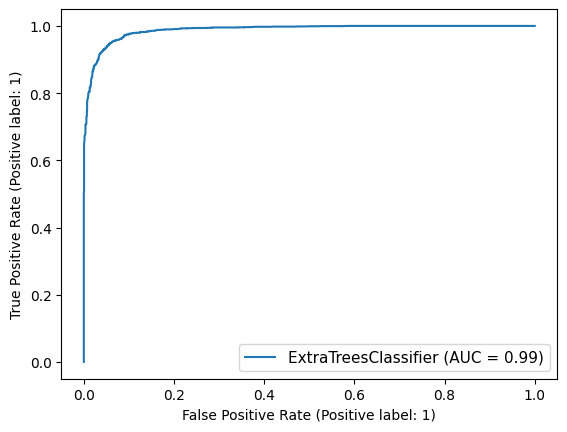

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.9450776775254387


In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
disp =RocCurveDisplay.from_estimator(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## plot confusion matrix

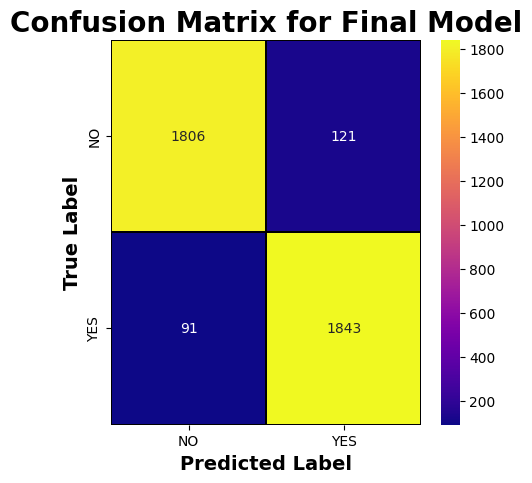

In [95]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

## Saving the model

In [96]:
import joblib
joblib.dump(Final_mod,'weatherAUS_Final.pkl')

['weatherAUS_Final.pkl']

In [ ]:
df.head()